In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_function(f,tmin,tmax,tlabel=None,xlabel=None,axes=False, **kwargs):
    ts = np.linspace(tmin,tmax,1000)
    if tlabel:
        plt.xlabel(tlabel,fontsize=18)
    if xlabel:
        plt.ylabel(xlabel,fontsize=18)
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    if axes:
        total_t = tmax-tmin
        plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
        plt.xlim(tmin-total_t/10,tmax+total_t/10)
        xmin, xmax = plt.ylim()
        plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
        plt.ylim(xmin,xmax)

In [4]:
def plot_volume(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="volume (bbl)", axes=axes, **kwargs)

def plot_flow_rate(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="flow rate (bbl/hr)", axes=axes, **kwargs)

In [6]:
def volume(t):
    return (t-4)**3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64

In [5]:
def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1)) / (t2 - t1)

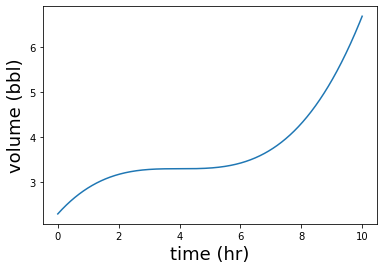

In [9]:
plot_volume(volume, 0, 10)
plt.show()

In [10]:
volume(4)

3.3

In [11]:
volume(9)

5.253125

In [12]:
average_flow_rate(volume, 4, 9)

0.390625

In [13]:
def decreasing_volume(t):
    if t < 5:
        return 10 - (t**2)/5
    else:
        return 0.2*(10-t)**2

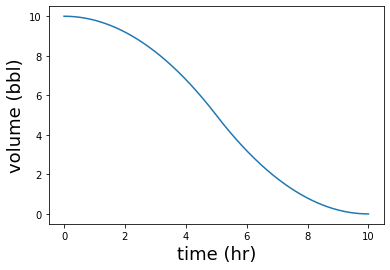

In [17]:
plot_volume(decreasing_volume,0,10)
plt.show()

In [18]:
average_flow_rate(decreasing_volume, 0, 4)

-0.8

## Suppose you start a road-trip at noon, when your odometer reads 77,641 miles and you end your road-trip at 4:30 in the afternoon with your odometer reading 77,905 miles. What was your average speed during the trip?

In [19]:
264 / 4.5

58.666666666666664

## Write a python function secant_line(f, x1, x2) that takes a f(x) and two x values x1 and x2 and returns a new function representing a secant line over time.

In [37]:
def secant_line(f, x1, x2):
    def line(x):
        return f(x1) + (x - x1) * (f(x2) - f(x1)) / x2 - x1
    return line

In [38]:
line = secant_line(volume, 0, 3)

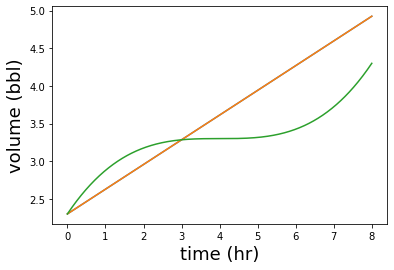

In [41]:
plot_function(line, 0, 8)
plot_volume(volume, 0, 8)
plt.show()